<a href="https://colab.research.google.com/github/larvinnn/stablediffusionqr/blob/master/DDW_Midterm_Mock_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OO Question: DFS with Stack [16pts]

Take a look at the implementation of Stack in our Cohort problem.

The class has the following properties:

- `is_empty` is a computed property which returns either `True` or `False` depending on whether the stack is empty or not.
- `size` is a computed property which returns the number of items in the stack.

The class also has the following interface:

- `__init__()` to initialise an empty list for the stack to store the items.
- `push(item)` which stores an integer into the top of the stack.
- `pop()` which returns and removes the top element of the stack. The return value is optional as it may return `None` if there are no more elements in the stack.
- `peek()` which returns the top element of the stack. If the stack is empty, it returns `None`.

In [ ]:
class Stack:
    def __init__(self):
        self._items = []

    def push(self, item):
        self._items.append(item)
        pass

    def pop(self):
        if len(self._items) >= 1:
            return self._items.pop()
        pass

    def peek(self):
        if len(self._items) >= 1:
            return self._items[-1]
        pass

    @property
    def is_empty(self):
        return self._items == []

    @property
    def size(self):
        return len(self._items)

    def __str__(self):
        if self.is_empty:
            return 'The stack is empty'
        out = 'Top\n'
        for i in range(len(self._items)-1, 0, -1):
            out += str(self._items[i]) + '\n'
        out += str(self._items[0]) + '\n' + 'Bottom\n'
        return out

## Question 1 [3pts]

Create a class `UniqueStack` as a subclass of `Stack`. The class should override the regular `push` method in `Stack`.

- [1pt] `push(self, item)`: adds item to the top of the stack _if and only if_ the item does **not** already exist in the stack. It should return `True` if the item is successfully added to the stack, and `False` otherwise.
- [1pt] `__contains(self, item)__`: check if the stack contains the given item. It should return `True` or `False` accordingly.

The class should also have the following method:

- [1pt] `reset(self)`: empties the stack (empties `__items`) right away

In [ ]:
class UniqueStack(Stack):
    def __contains__(self, item):
        ###
        ### YOUR CODE HERE
        ###
        pass

    def push(self, item):
        ###
        ### YOUR CODE HERE
        ###
        pass

    def reset(self):
        ###
        ### YOUR CODE HERE
        ###
        pass

In [ ]:
## Question 1 sample test
unique_stack = UniqueStack()
assert unique_stack.is_empty == True
assert unique_stack.push(5) == True
assert unique_stack.is_empty == False
assert (5 in unique_stack) == True
assert (6 in unique_stack) == False
assert unique_stack.push(6) == True
assert unique_stack.push(6) == False
print(unique_stack)
# Top
# 6
# 5
# Bottom

assert unique_stack.pop() == 6
print(unique_stack)
# Top
# 5
# Bottom

unique_stack.reset()
assert unique_stack.is_empty == True
assert (3 in unique_stack) == False

## Question 2 [2pts]

Now observe the class `Vertex` we used in our cohort problem. Extend the `Vertex` class so it implements the following method:

- [2pts] `remove_neighbour(self, nbr_vertex)`: This will remove `nbr_vertex` from the dictionary `neighbours` in this `Vertex` instance. It should return `False` if one attempts to remove a neighbour that does not exist. Otherwise, it returns `True`.

You can always assume that `id` for any Vertices is **always** a string. You don't have to account for any illegal inputs.

In [ ]:
class Vertex:
    def __init__(self, id=""):
        self.id = id
        self.neighbours = {}

    def add_neighbour(self, nbr_vertex, weight=0):
        self.neighbours[nbr_vertex] = weight

    def remove_neighbour(self, nbr_vertex):
        ###
        ### YOUR CODE HERE
        ###
        pass

    def get_neighbours(self):
        return list(self.neighbours.keys())

    def __str__(self):
        return 'Vertex {self.id} is connected to: '.format(self=self) \
                + ', '.join([x.id for x in self.get_neighbours()])

In [ ]:
## Question 2 sample test
v1 = Vertex('1')
v2 = Vertex('2')
v1.add_neighbour(v2)
v3 = Vertex('3')
v1.add_neighbour(v3, 3)
print(v1)
# Vertex 1 is connected to: 2, 3

assert v1.remove_neighbour(v2)
assert not v1.remove_neighbour(v2)
print(v1)
# Vertex 1 is connected to: 3

## Question 3 [2pts]

Now read the `Graph` class that we used in our Cohort problems as well. Note that this is a **directed** graph. Extend the `Graph` class so it implements the following methods:

- [2pts] `remove_edge(self, start_v, end_v)`: This will remove the edge from `start_v` and `end_v` if both vertices exist in the graph. It should return `False` if one attempts to remove a neighbour that does not exist. Otherwise, it returns `True`.
- Hint: you can use `Vertex`'s method `remove_neighbour(v)` from the previous question. Note that the argument for `remove_neighbour(v)` is a `Vertex` object while the arguments for `remove_edge(start_v, end_v)` are the Vertices' `id`, which is a **string**.

In [ ]:
class Graph:
    def __init__(self):
        self.vertices = {}

    def _create_vertex(self, id):
        return Vertex(id)

    def add_vertex(self, id):
        v = self._create_vertex(id)
        self.vertices[v.id] = v

    def get_vertex(self, id):
        v = self.vertices.get(id, None)
        return v

    def add_edge(self, start_v, end_v, weight=0):
        if start_v not in self.vertices:
            vs = self.add_vertex(start_v)
        vs = self.vertices[start_v]
        if end_v not in self.vertices:
            ve = self.add_vertex(end_v)
        ve = self.vertices[end_v]
        vs.add_neighbour(ve, weight)

    def remove_edge(self, start_v, end_v):
        ###
        ### YOUR CODE HERE
        ###
        pass

    def get_neighbours(self, id):
        v = self.get_vertex(id)
        if v is not None:
            neighbours = v.get_neighbours()
            result = []
            for n in neighbours:
                result.append(n.id)
            # print("unsorted neighbours result", result)
            return result
        else:
            return None

    def __contains__(self, val):
        return val in self.vertices.keys()

    def __iter__(self):
        for k,v in self.vertices.items():
            yield v

    @property
    def num_vertices(self):
        return len(self.vertices)

    def __str__(self):
        out = ''
        for v in self:
            out += v.__str__()
            out += '\n'
        return out

In [ ]:
## Question 3 sample test
g = Graph()
assert g.vertices == {} and g.num_vertices == 0
g.add_vertex('A')
g.add_vertex('B')
g.add_vertex('C')
g.add_vertex('D')
g.add_edge('A', 'D')
g.add_edge('A', 'C') # by here, A has two children: D and C. DFS should explore node C first (alphabetical traversal)
g.add_edge('C', 'B')
g.add_edge('C', 'D')
print(g)
# Vertex A is connected to: D, C
# Vertex B is connected to:
# Vertex C is connected to: B, D
# Vertex D is connected to:

# test remove
assert g.remove_edge('C', 'B') # success, node B is disjoint from A, C, and D
assert not g.remove_edge('A', 'A')
print(g)
# Vertex A is connected to: D, C
# Vertex B is connected to:
# Vertex C is connected to: D
# Vertex D is connected to:

## Question 4 [4pts]

Create a class `DirectedGraph` as a subclass of `Graph`. Implement the following method:

`depth_first_search(self, v_id, unique_stack, temp_stack = Stack(), n = float('inf'))`:

- It performs a DFS traversal on the graph utilising a Stack ADT. An iterative DFS will be an easier way to implement this.

- It **always** explores adjacent vertices **alphabetically**, for instance, if a vertex 'A' has adjacent vertices 'G' and 'E', it will **always** explore 'E' first.

- **You can assume that all vertices in the Graph has a distinct `id`.**

- Thee **arguments must** be given:

    - `v_id` (String): This is the starting vertex **id**. The algorithm should traverse through all vertices in the `DirectedGraph` instance that are reachable by `v_id`.
    - `unique_stack` (UniqueStack): A UniqueStack instance. If you call `depth_first_search` the first time, then this should be a new UniqueStack instance (empty stack). Otherwise, see sample test case given.
    - `temp_stack` (Stack): A regular Stack instance. If you call `depth_first_search` the first time, then this should be a new Stack instance (empty stack). Otherwise, see sample test case given.
        - When the function returns, the **content** of `temp_stack` is all _univisited_ adjacent vertices `v_id` of the visited vertices **after** `n` vertices are explored (added to `unique_stack`).
        - The reason we have this stack is so that we can **"pause"** the execution of DFS after `n` vertices are explore to examine these explored vertices, and then **resume** back until completion by passing the same `temp_stack` back (see the given sample test) to the following call of `depth_first_search`.
        - You are free to utilise the `temp_stack` however you like. We won't be checking the contents of this stack during autograding. You should simply ensure that `depth_first_search` can resume.
    
- There is one **optional** argument,

    - `n` (int): indicates the number of vertices that **must be visited** before the function returns. If not specified, `n` is set to inf and the function will run until all vertices that are reachable from `v_id` are explored. You can **assume that if set, `n` is always less than the number of reachable vertices from `v_id`**. In other words, given the assumption above, if `n` is set to be a positive value other than `inf`, then the value of `unique_stack.size` **must** be `n` when the function returns, and

- **Return** value:

    - The function should return `temp_stack`

Final note:

- **You must implement** DFS using both the stack data structure `temp_stack` and `unique_stack`
- You don't have to account for illegal inputs. Assume that `v_id` is always a string, `unique_stack` is an instance of `UniqueStack`, and so on.
- The function also should **NOT** alter the Graph in any way. The Graph's attributes and properties should remain the same prior to and after running `depth_first_search`.

In [ ]:
class DirectedGraph(Graph):
    def depth_first_search(self, v_id, unique_stack, temp_stack = Stack(), n = float('inf')):
        ###
        ### YOUR CODE HERE
        ###
        return temp_stack

In [ ]:
## Question 4 sample test
def create_graph():
    g = DirectedGraph()
    assert g.vertices == {} and g.num_vertices == 0
    g.add_vertex('A')
    g.add_vertex('B')
    g.add_vertex('C')
    g.add_vertex('D')
    g.add_vertex('E')
    g.add_vertex('F')
    g.add_edge('A', 'C')
    g.add_edge('A', 'D') # by here, A has two children: D and C. DFS should explore node C first (alphabetical traversal)
    g.add_edge('B', 'D')
    g.add_edge('B', 'C')
    g.add_edge('C', 'D')
    g.add_edge('C', 'E')
    g.add_edge('D', 'B')
    g.add_edge('D', 'A')
    g.add_edge('D', 'D')
    g.add_edge('D', 'E')
    return g

g = create_graph()
print(g)
# Vertex A is connected to: C, D
# Vertex B is connected to: D, C
# Vertex C is connected to: D, E
# Vertex D is connected to: B, A, D, E
# Vertex E is connected to:
# Vertex F is connected to:

# We will call depth_first_search for the first time
# Create a new instance of UniqueStack and Stack
unique_stack = UniqueStack()
temp_stack = Stack()
print('Performing DFS to visit just three nodes.')

# call DFS for n=3, then store the temp_stack output
temp_stack = g.depth_first_search('A', unique_stack, temp_stack, n=3)
print(unique_stack) # node A, then node B, then node C were explored in that order
# Top
# D
# C
# A
# Bottom

print('Resuming DFS...')
# pass back the temp_stack from the output of the first depth_first_search function call as input to the second depth_first_search function call
temp_stack = g.depth_first_search(temp_stack.pop(), unique_stack, temp_stack)
print(unique_stack) # DFS explores A -> C -> D -> B -> E. Node F is disjoint and wont be explored.
# Top
# E
# B
# D
# C
# A
# Bottom

print(temp_stack) # The stack is empty, all nodes explored
print(g) # same output as above, graph is unaltered

## Question 5 [5pts]

Create a class `Tree` as a subclass of `Graph`. It has **one** attribute that has to be initialised upon instatiation:

- [1pt] `root`: the `id` of the starting vertex of the Tree. This means the `vertices` in the base class Graph must be updated upon initialisation.

[4pts] Override the method: `add_edge(self, start_v, end_v, weight=0)` such that it will **successfully** add an edge if ALL the following conditions are **True**:

- It does **not** cause a cycle, that is: no edge is pointed back to _any_ of the ancestores **and**,
- It does not cause the destinatation vertex to be accessible by the root via more than one path. For instance given an existing graph A -> B, A -> C, we cannot add an edge B -> C as it causes C to be accessible by two paths: A -> C and A -> B -> C.
- It is `start_v` is **EXPLORABLE** from the `root`

_Hint: you may want to reuse the DFS method of `Graph` class._

In [ ]:
class Tree(Graph):
    def __init__(self, root):
        ###
        ### YOUR CODE HERE
        ###
        pass

    def add_edge(self, start_v, end_v, weight=0):
        ###
        ### YOUR CODE HERE
        ###
        pass

In [ ]:
## Question 5 sample test
tree = Tree('A')
assert tree.add_edge('A', 'B') == True
assert tree.add_edge('A', 'C') == True
assert tree.add_edge('B', 'C') == False # causes C to be explorable BOTH from A and B
assert tree.add_edge('C', 'B') == False # causes B to be explorable BOTH from A and C
assert tree.add_edge('D', 'E') == False # adds disjoint tree, should return False
assert tree.add_edge('A', 'E') == True

print(tree)

# Algo Question: Quicksort [5pts]

In the first six weeks of class, we studied a few different sorting algorithms, including **bubble sort** or **insertion sort**. For this question, you will have to implement **quicksort**, which is another popular sorting algorithm.

## Algorithm

Quicksort algorithm works as follows:

1. Create three empty sublists: `low`, `same`, and `high`
2. Choose a random element in the list as a `pivot`
3. Go through each element in the list

    - If the current element is smaller than the pivot, store it in the `low` sublist
    - If the current element is equal to the pivot, store it in the `same` sublist
    - If the current element is larger than the pivot, store it in the `high` sublist

4. Return a concatenation of the following lists:

    - The result of quicksort called on `low`
    - `same`
    - The result of quicksort called on `high`

Here is an illustration of the quicksort algorithm:

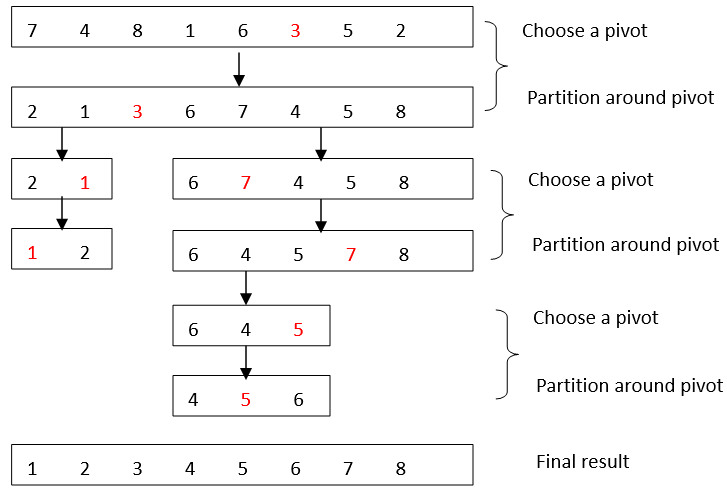

## Implementation

For this question, we will implement quicksort, but will add the following optimisation and changes:

- Before choosing a pivot, if the `list` contains zero or one element, return the `list` without going through the pivot
- You will need to store all the pivots you chose in the `pivots` argument given to the `quicksort` function.

Additional instructions:

- Since we are using random numbers, we will use a seed value of `100` to get consistent results. Do not modify the seed initialisation in the code.
- The pivot can be any element from the list, at an index between `0` and `len(array) - 1` (inclusive)
- **The function returns a new list, leaving the original list provided as an argument unsorted**

In [ ]:
import random

pivots = []

def quicksort(array, pivots):
    # Initilalising the seed to 100 to get consistent random results
    random.seed(100)

    ###
    ### YOUR CODE HERE
    ###

In [ ]:
# check data type (1pt)
l = [9, 5, 8, 15, 19, 9, 4, 10, 17, 7]
pivots = []
result = quicksort(l, pivots)
assert isinstance(l, list)
assert isinstance(result, list)
assert isinstance(pivots, list)

In [ ]:
# check length (1pt)
l = [9, 5, 8, 15, 19, 9, 4, 10, 17, 7]
pivots = []
result = quicksort(l, pivots)
assert len(pivots) == 5
assert len(result) == 10
assert len(l) == 10

In [ ]:
# check element type (1pt)
l = [9, 5, 8, 15, 19, 9, 4, 10, 17, 7]
pivots = []
result = quicksort(l, pivots)
assert isinstance(pivots[0], int)
assert isinstance(result[-1], int)
assert isinstance(l[len(l)//2], int)

In [ ]:
## Test case 1 (2pts)
l = [9, 5, 8, 15, 19, 9, 4, 10, 17, 7]
pivots = []
result = quicksort(l, pivots)
assert result == [4, 5, 7, 8, 9, 9, 10, 15, 17, 19]
assert l == [9, 5, 8, 15, 19, 9, 4, 10, 17, 7]
assert pivots == [8, 5, 15, 9, 19]